In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import clustering_algorithms
from clustering_algorithms import clustering_pipeline
from clustering_algorithms import many_kmeans

plt.style.use("seaborn")
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Read in Data

In [2]:
df=pd.read_csv('final_df.csv')
df=df.drop('Unnamed: 0', 1)
df.head()

name  location.lat  location.lon  \
0             Alabama A & M University     34.783368    -86.568502   
1  University of Alabama at Birmingham     33.502230    -86.809170   
2  University of Alabama in Huntsville     34.722818    -86.638420   
3             Alabama State University     32.364317    -86.295677   
4            The University of Alabama     33.214400    -87.545766   

   minority_serving.historically_black  act_scores.midpoint.cumulative  \
0                                  1.0                            18.0   
1                                  0.0                            25.0   
2                                  0.0                            27.0   
3                                  1.0                            18.0   
4                                  0.0                            27.0   

   sat_scores.average.overall  demographics.race_ethnicity.white  \
0                       850.0                             0.0340   
1                      1147.0                             0.5863   
2                      1221.0                             0.7024   
3                       844.0                             0.0165   
4                      1181.0                             0.7807   

   net_price_less_30000  net_price_30001_48000  net_price_48001_75000  \
0               13075.0                12458.0                15857.0   
1               13614.0                14746.0                17601.0   
2               15252.0                17228.0                19178.0   
3                7519.0                 2611.0                 9831.0   
4               17263.0                19279.0                21309.0   

                      ...                      open_admissions_policy  \
0                     ...                                         2.0   
1                     ...                                         2.0   
2                     ...                                         2.0   
3                     ...                                         2.0   
4                     ...                                         2.0   

   accreditor_code  outcome_cohort.full_time.first_time.6yr  \
0           SACSCC                                   1044.0   
1           SACSCC                                   1246.0   
2           SACSCC                                    765.0   
3           SACSCC                                   1330.0   
4           SACSCC                                   5009.0   

   outcome_cohort.full_time.first_time.8yr  \
0                                   1044.0   
1                                   1245.0   
2                                    765.0   
3                                   1330.0   
4                                   5009.0   

   outcome_cohort.part_time.first_time.6yr  \
0                                      2.0   
1                                     30.0   
2                                     31.0   
3                                     49.0   
4                                     82.0   

   outcome_cohort.part_time.first_time.8yr  \
0                                      2.0   
1                                     30.0   
2                                     31.0   
3                                     49.0   
4                                     82.0   

   outcome_cohort.full_time.not_first_time.6yr  \
0                                        110.0   
1                                        686.0   
2                                        483.0   
3                                        177.0   
4                                       1131.0   

   outcome_cohort.full_time.not_first_time.8yr  \
0                                        110.0   
1                                        686.0   
2                                        483.0   
3                                        177.0   
4                                       1131.0   

   outcome_cohort.part_time.not_first_time.6yr  \
0                  

# Set Data Types

In [3]:
division=list(df.division)

In [4]:
df=df.drop(columns=['title_iv.approval_date', 'accreditor_code', 'city', 'state', 'Description', 'division', 'accreditor', 'school_url', 'price_calculator_url', 'rank_lac', 'Rank'])

In [5]:
names=df['name']
df=df.drop(columns=['name'])

In [6]:
for column in df.columns:
    try:
        df[f'{column}'].astype(float)
    except:
        new_col=[]
        for value in df[f'{column}']:
            try:
                new_col.append(float(value))
            except:
                new_col.append(0)
        df[f'{column}']=(new_col)

In [7]:
np.any(np.isnan(df))

False

In [8]:
df['division']=division

In [9]:
df=pd.get_dummies(df, columns=['division'])

In [10]:
df.dtypes

location.lat                                          float64
location.lon                                          float64
minority_serving.historically_black                   float64
act_scores.midpoint.cumulative                        float64
sat_scores.average.overall                            float64
demographics.race_ethnicity.white                     float64
net_price_less_30000                                  float64
net_price_30001_48000                                 float64
net_price_48001_75000                                 float64
net_price_75001_110000                                float64
net_price_above_110001                                float64
demographics.women                                    float64
locale                                                float64
admission_rate.overall                                float64
size                                                  float64
early_pay                                             float64
ownershi

# EDA

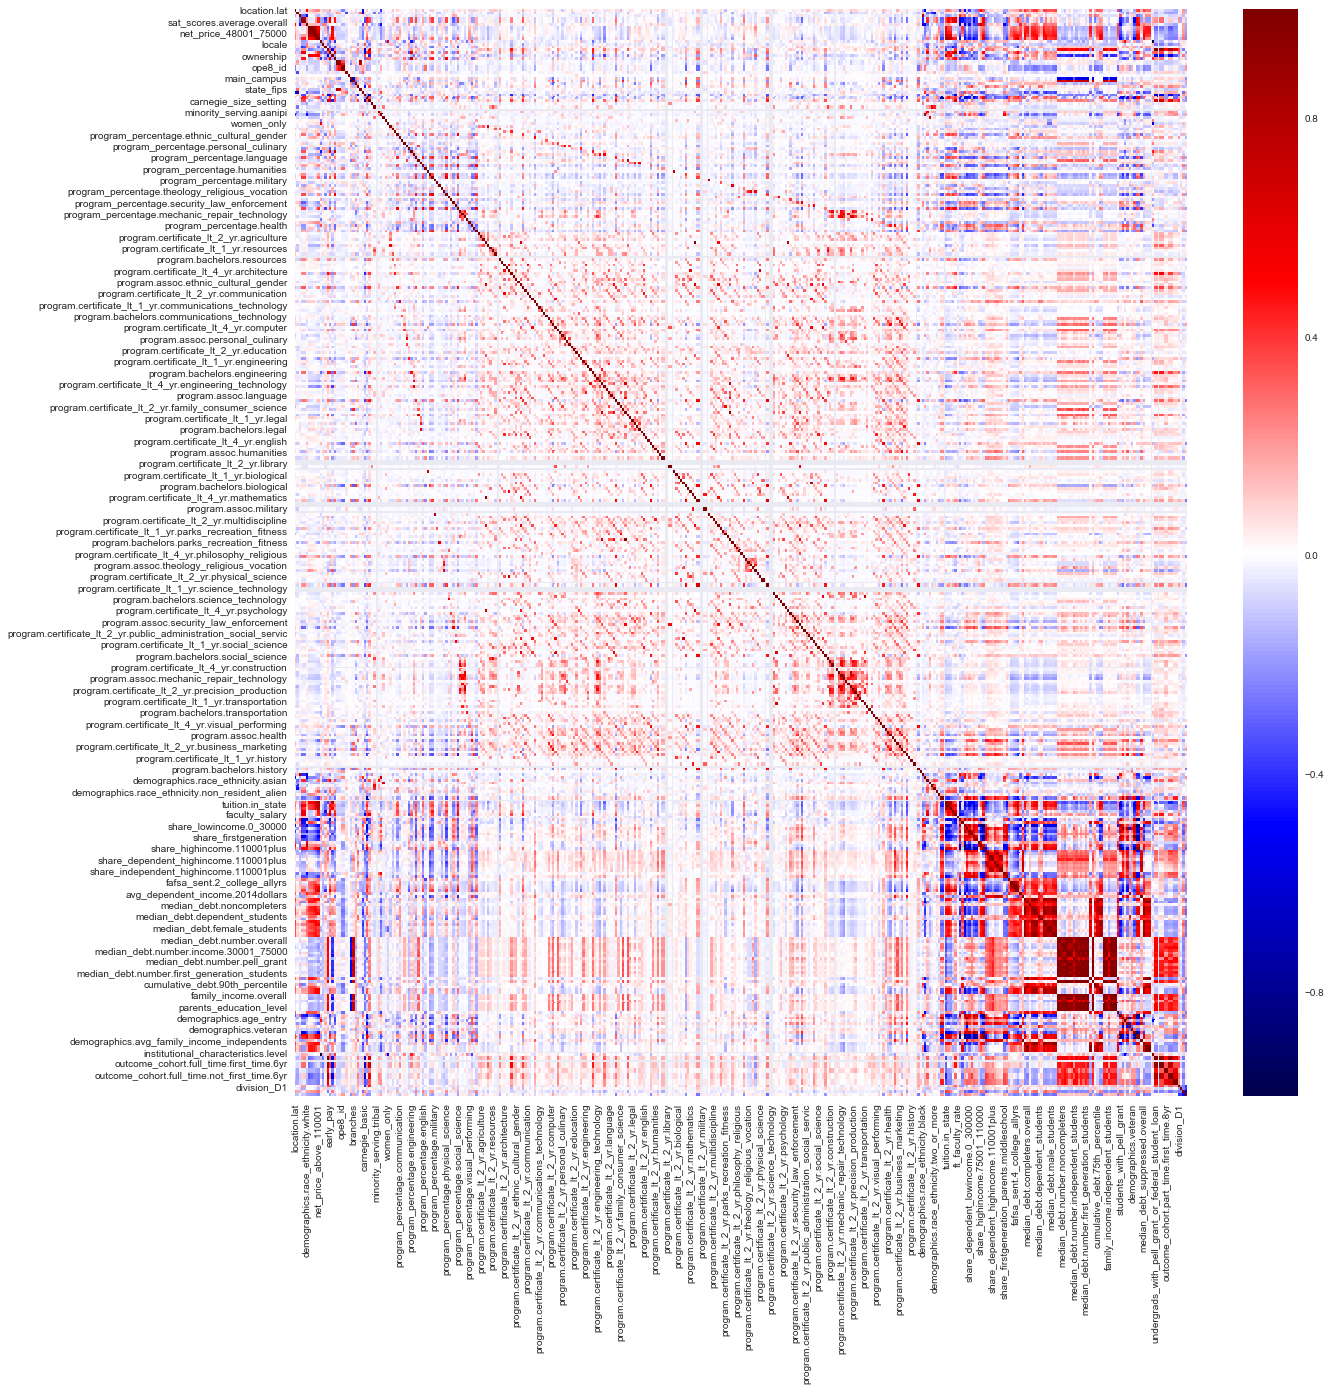

In [11]:
f, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df.corr(), cmap="seismic");

In [12]:
df.corr()[df.corr()>0.75]

location.lat  \
location.lat                                                 1.0   
location.lon                                                 NaN   
minority_serving.historically_black                          NaN   
act_scores.midpoint.cumulative                               NaN   
sat_scores.average.overall                                   NaN   
demographics.race_ethnicity.white                            NaN   
net_price_less_30000                                         NaN   
net_price_30001_48000                                        NaN   
net_price_48001_75000                                        NaN   
net_price_75001_110000                                       NaN   
net_price_above_110001                                       NaN   
demographics.women                                           NaN   
locale                                                       NaN   
admission_rate.overall                                       NaN   
size                                                         NaN   
early_pay                                                    NaN   
ownership                                                    NaN   
percent_stem                                                 NaN   
index                                                        NaN   
id                                                           NaN   
ope8_id                                                      NaN   
ope6_id                                                      NaN   
zip                                                          NaN   
under_investigation                                          NaN   
main_campus                                                  NaN   
branches                                                     NaN   
degrees_awarded.predominant                                  NaN   
degrees_awarded.highest                                      NaN   
state_fips                                                   NaN   
region_id                                                    NaN   
...                                                          ...   
students_with_any_loan                                       NaN   
students_with_pell_grant                                     NaN   
demographics.age_entry                                       NaN   
demographics.female_share                                    NaN   
demographics.married                                         NaN   
demographics.dependent                                       NaN   
demographics.veteran                                         NaN   
demographics.first_generation                                NaN   
demographics.avg_family_income                               NaN   
demographics.median_family_income                            NaN   
demographics.avg_family_income_independents                  NaN   
median_debt_suppressed.overall                               NaN   
median_debt_suppressed.completers.overall                    NaN   
median_debt_suppressed.completers.monthly_payments           NaN   
institutional_characteristics.level                          NaN   
demographics.men                                             NaN   
undergrads_with_pell_grant_or_federal_student_loan           NaN   
open_admissions_policy                                       NaN   
outcome_cohort.full_time.first_time.6yr                      NaN   
outcome_cohort.full_time.first_time.8yr                      NaN   
outcome_cohort.part_time.first_time.6yr                      NaN   
outcome_cohort.part_time.first_time.8yr                      NaN   
outcome_cohort.full_time.not_first_time.6yr                  NaN   
outcome_cohort.full_time.not_first_time.8yr                  NaN   
outcome_cohort.part_time.not_first_time.6yr                  NaN   
outcome_cohort.part_time.not_first_time.8yr                  NaN   
division_D1                                                  NaN   
division_D2                             

# Scale

In [13]:
df_std = StandardScaler().fit_transform(df)

# Choose Number of Components For PCA
Using PCA to Reduce Dimensionality
+ Decreases Interperetability, Going to Review Clusters After to Choose Best Cluster

In [14]:
cluster=clustering_algorithms.clustering_pipeline(100)

In [15]:
cluster.fit(df_std)

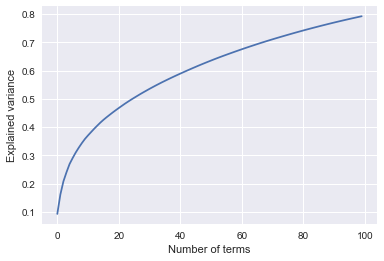

In [16]:
cluster.pca_plot()

# Choose Perplexity for TSNE

In [17]:
cluster.kmeans(10)

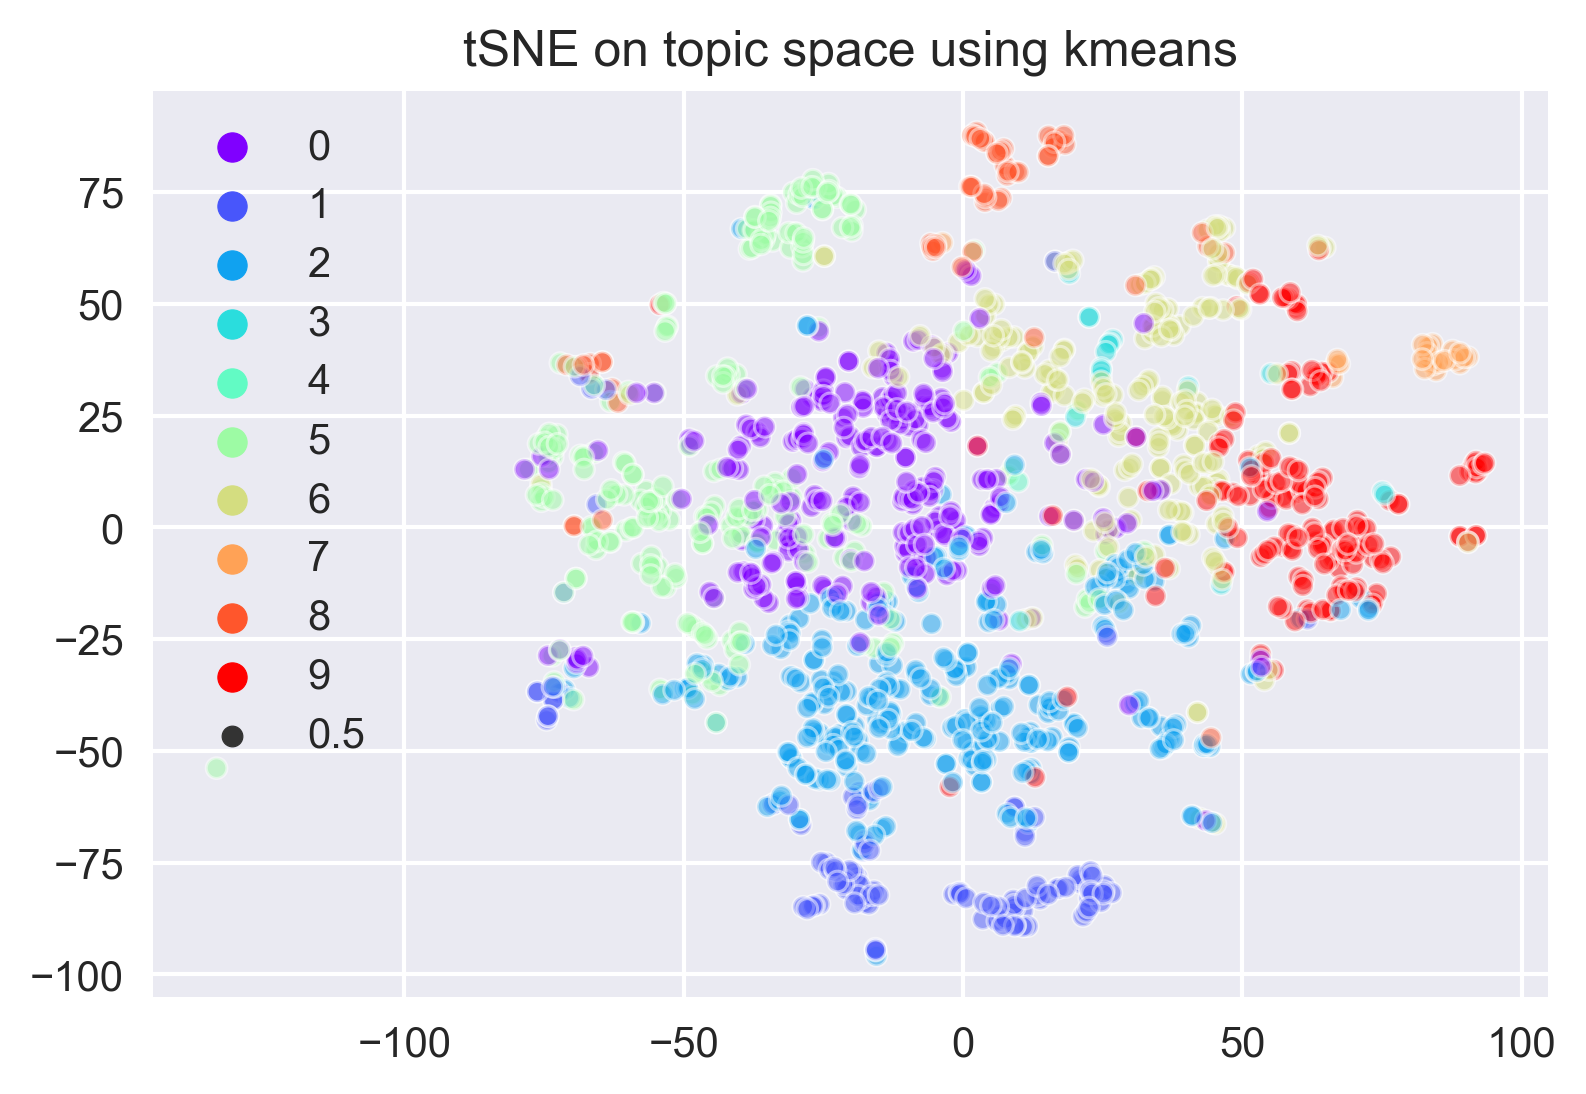

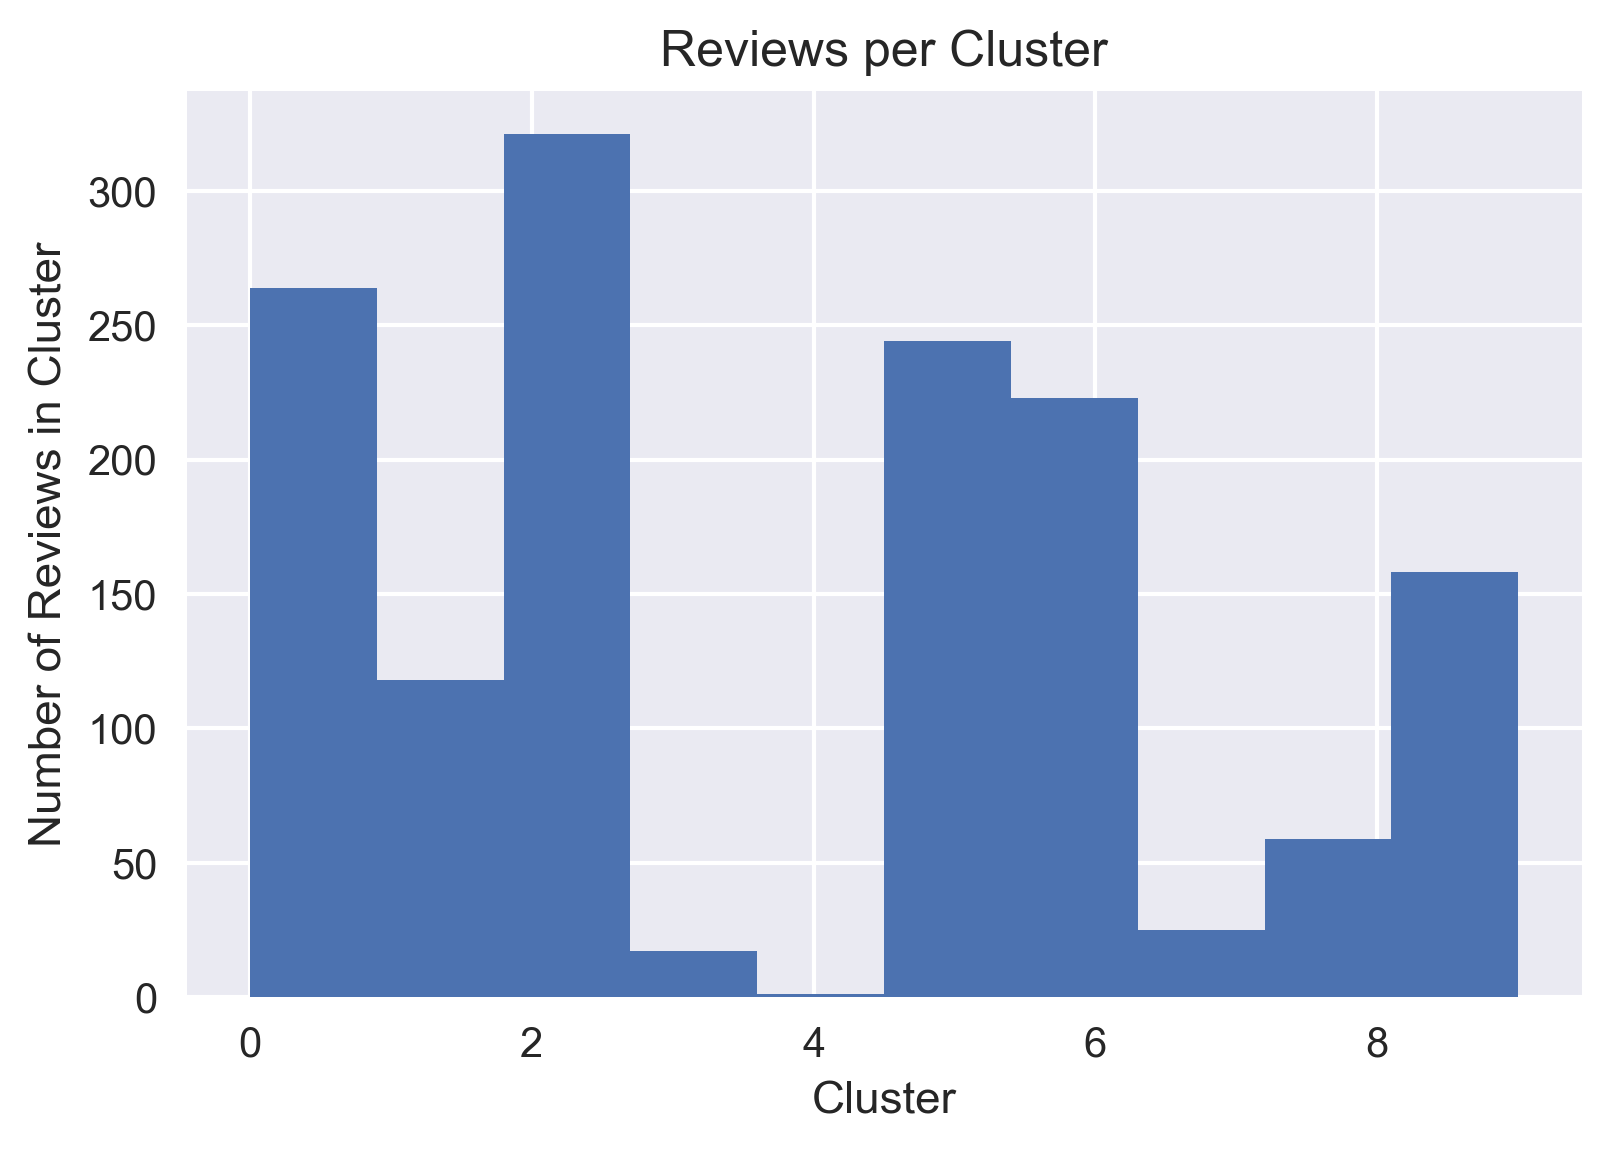

In [18]:
cluster.tsne(2, 5)

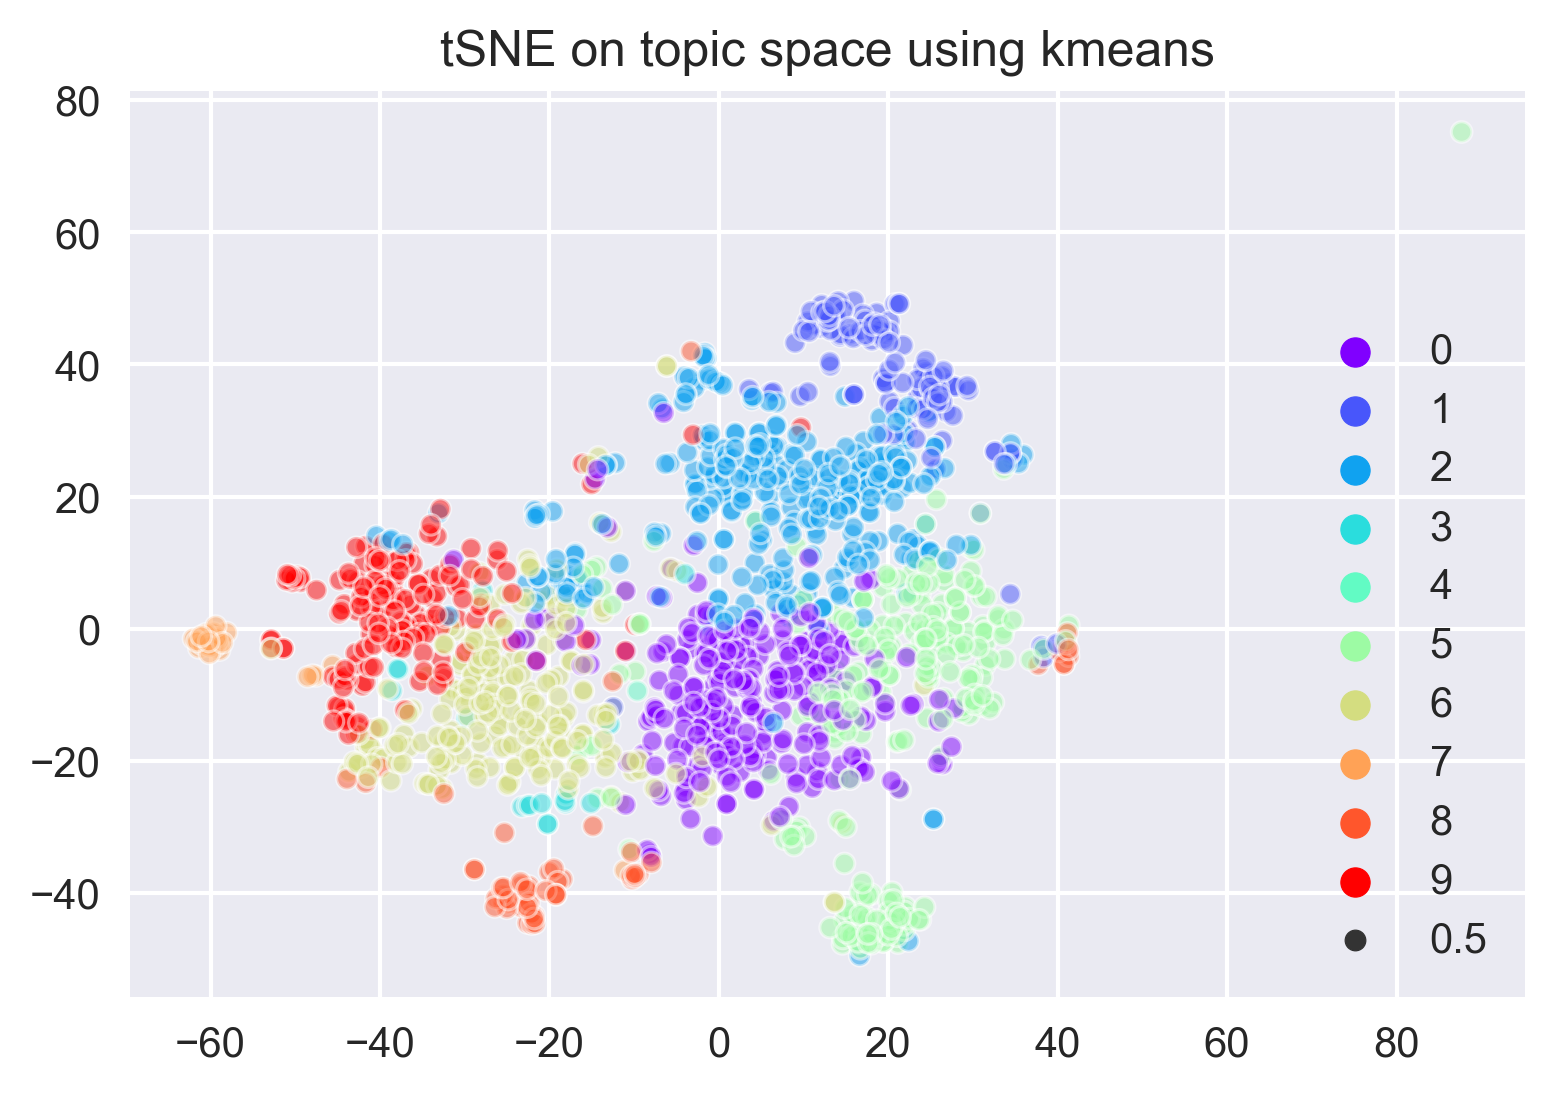

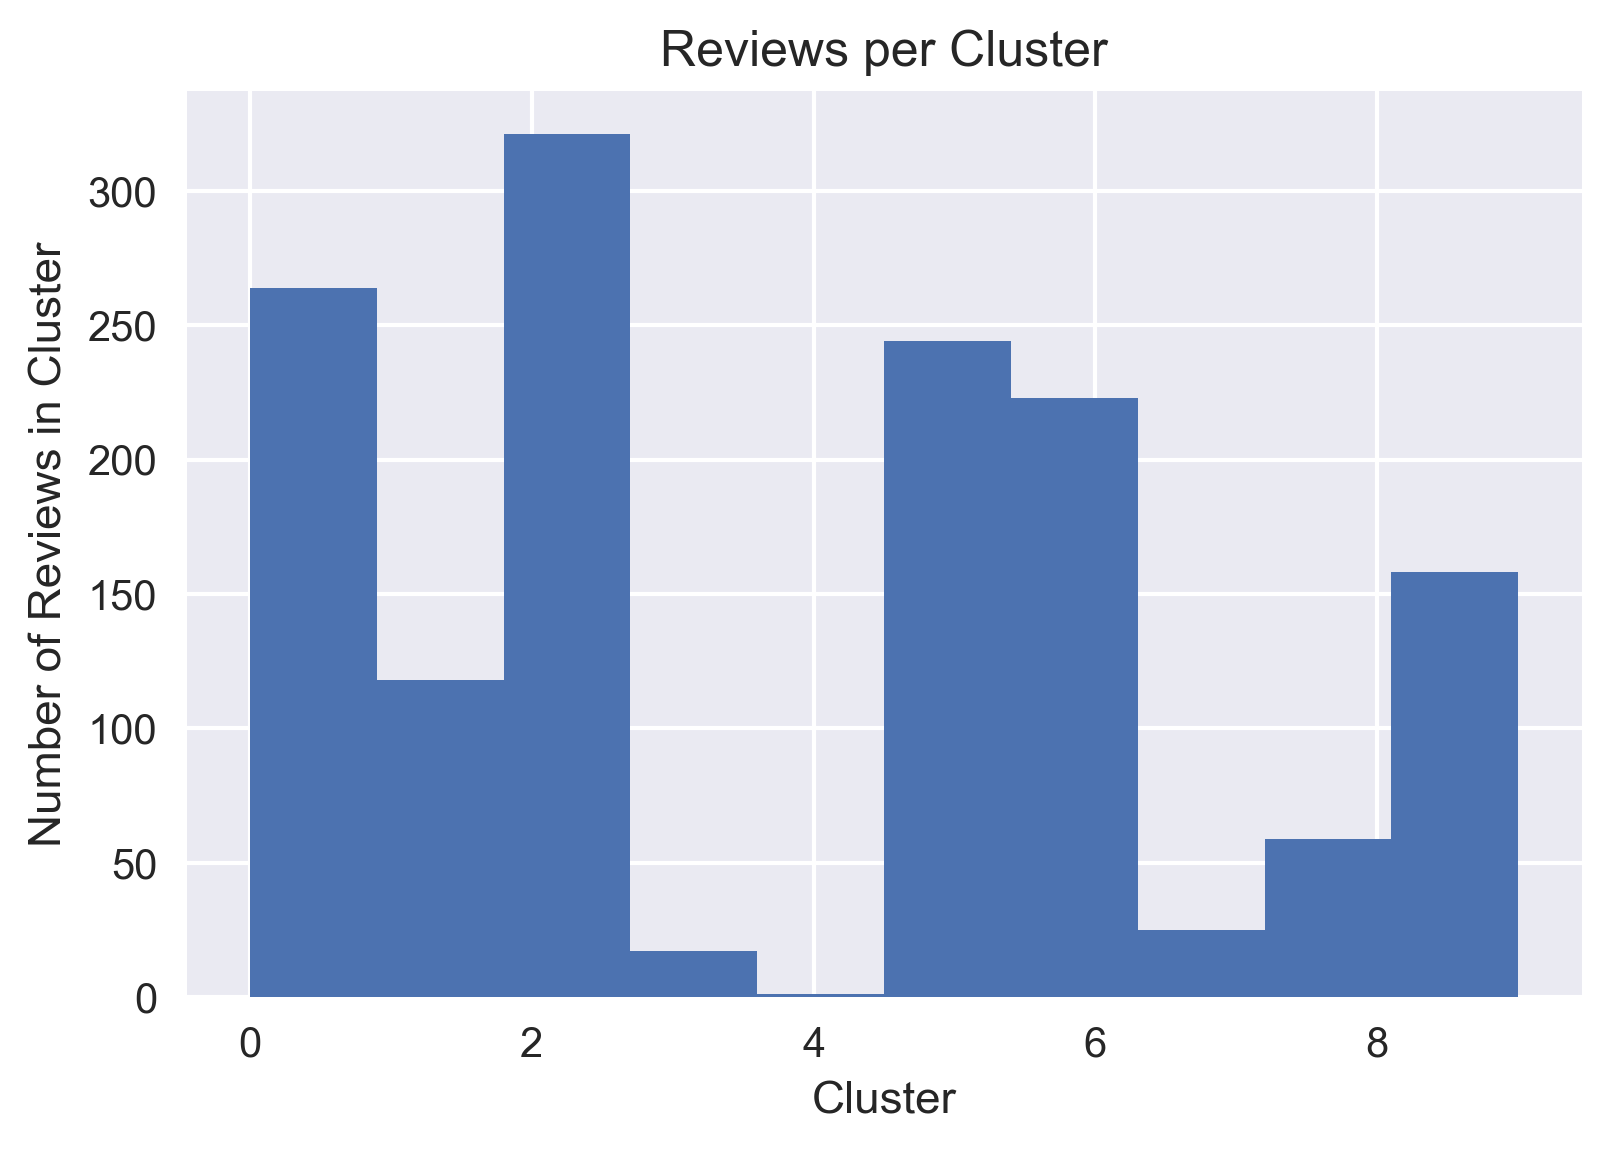

In [19]:
cluster.tsne(2, 25)

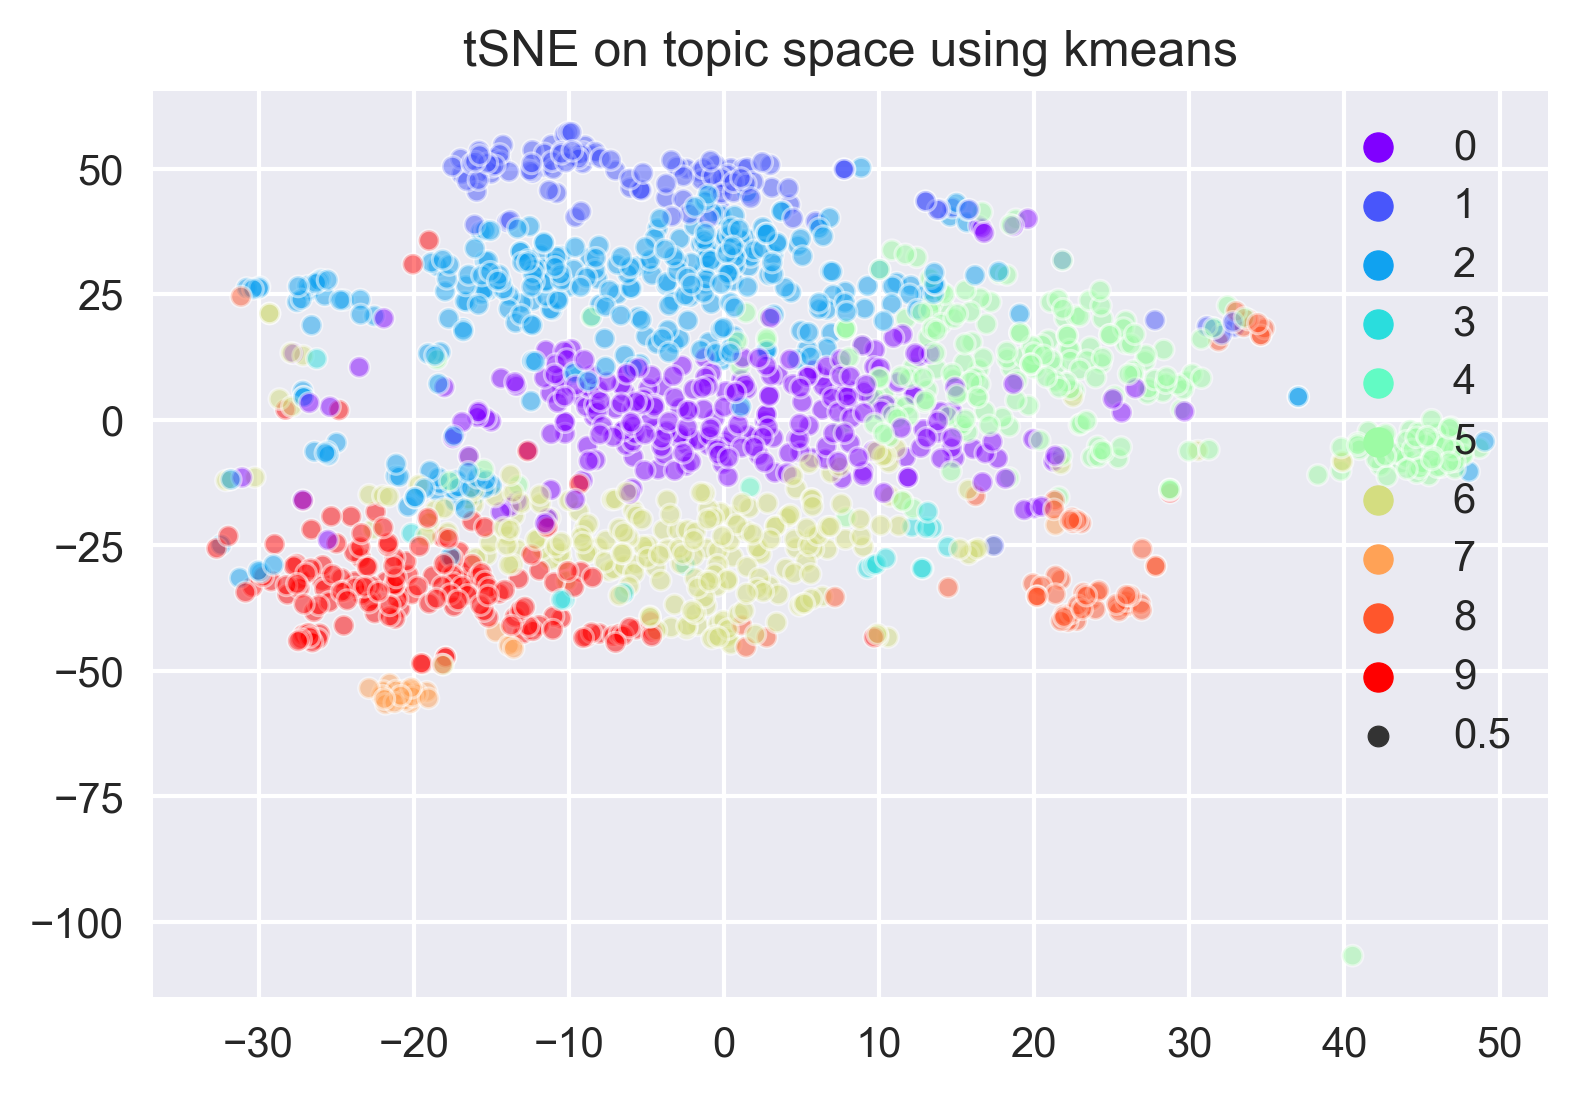

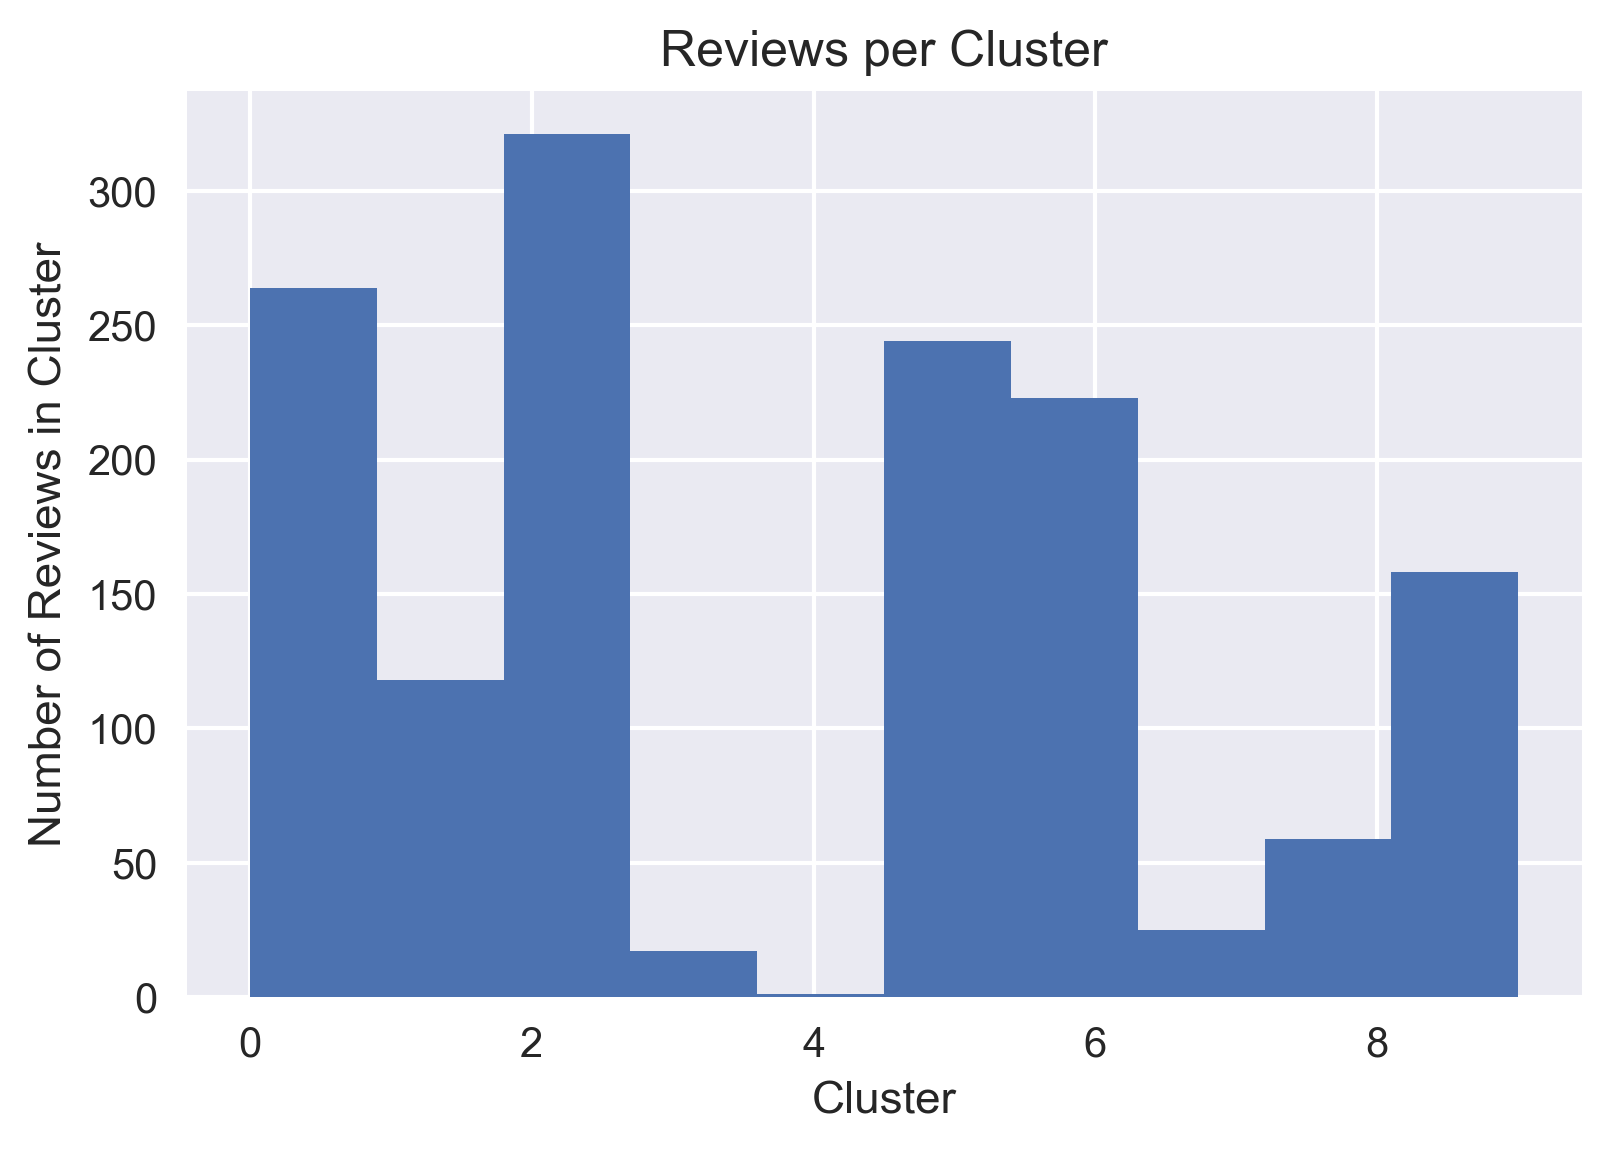

In [23]:
cluster.tsne(2, 30)

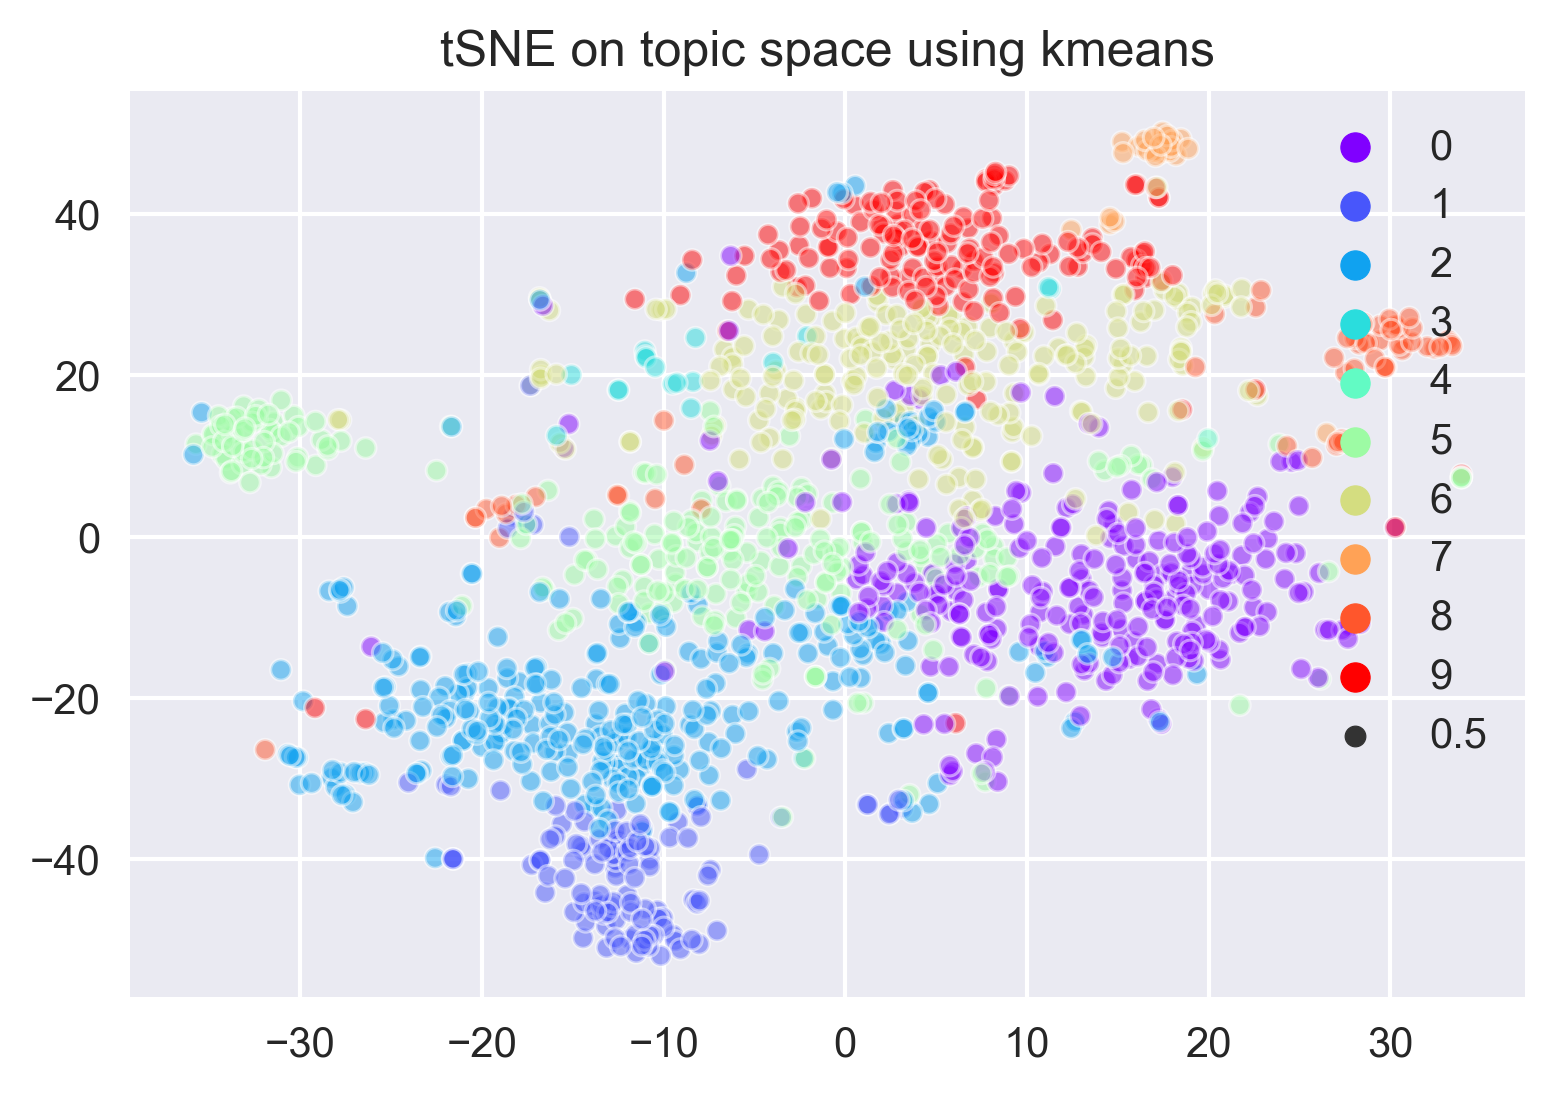

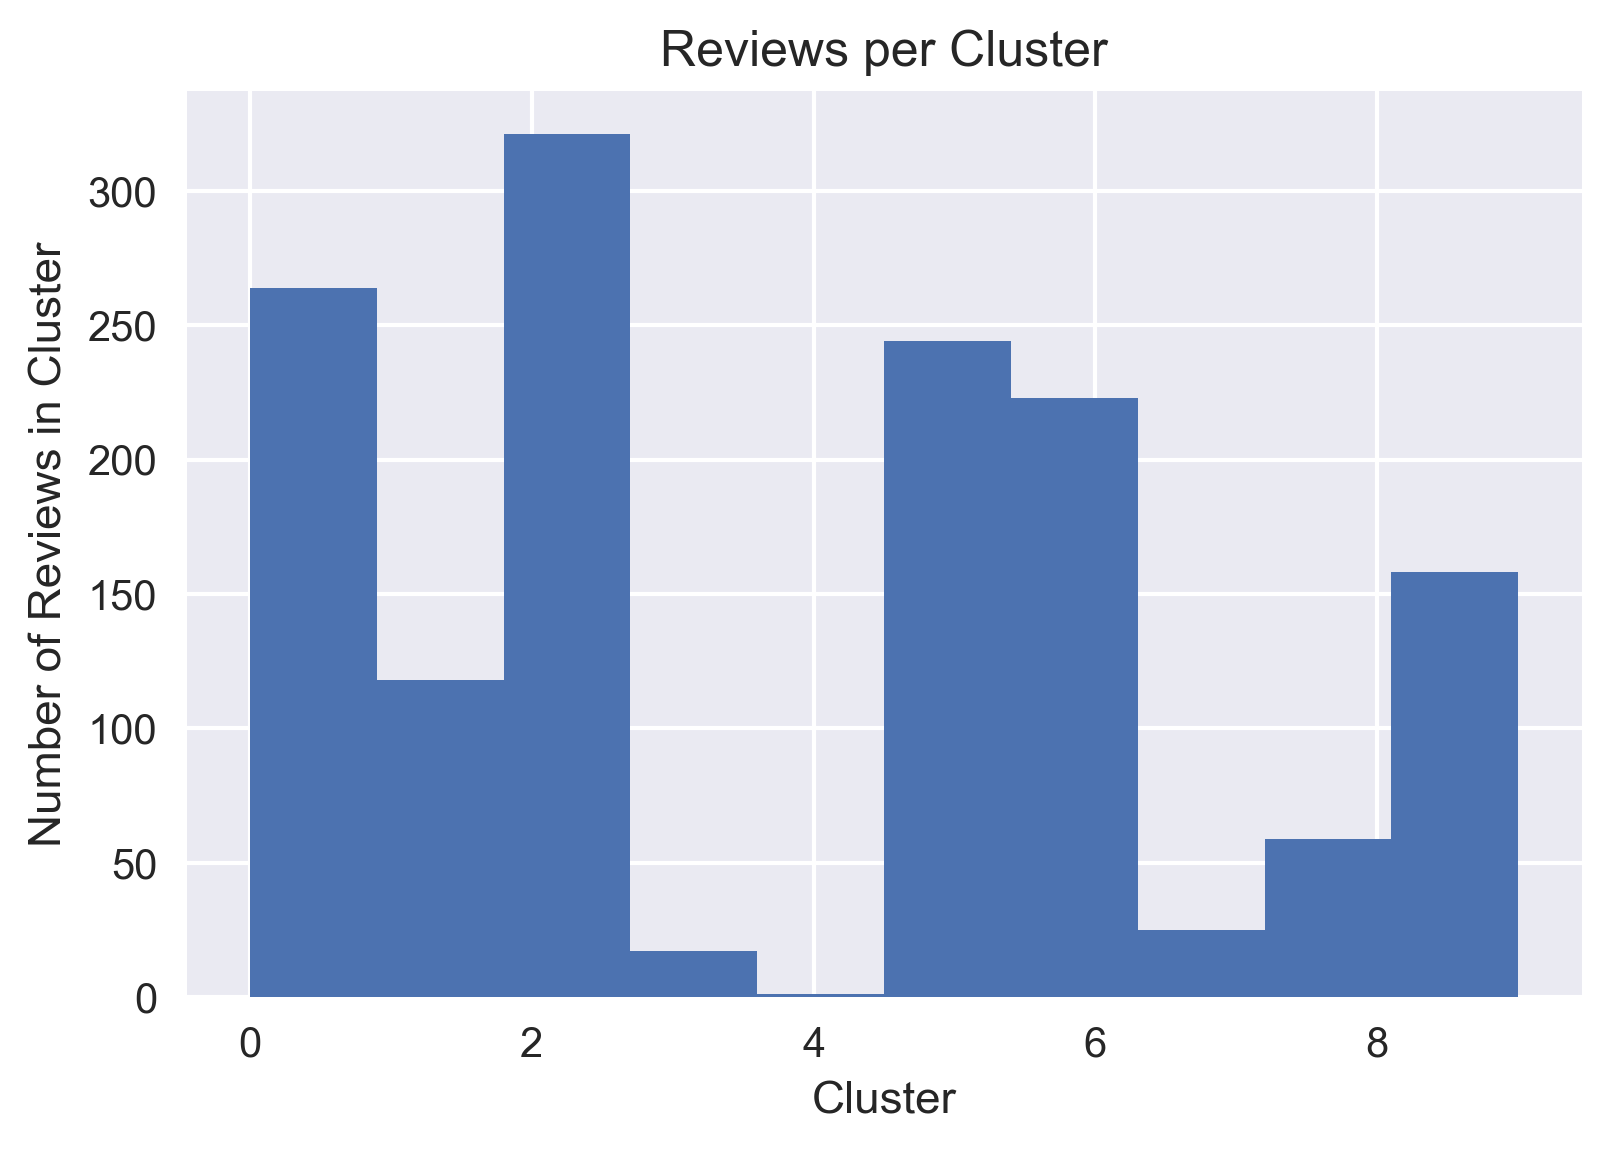

In [21]:
cluster.tsne(2, 40)

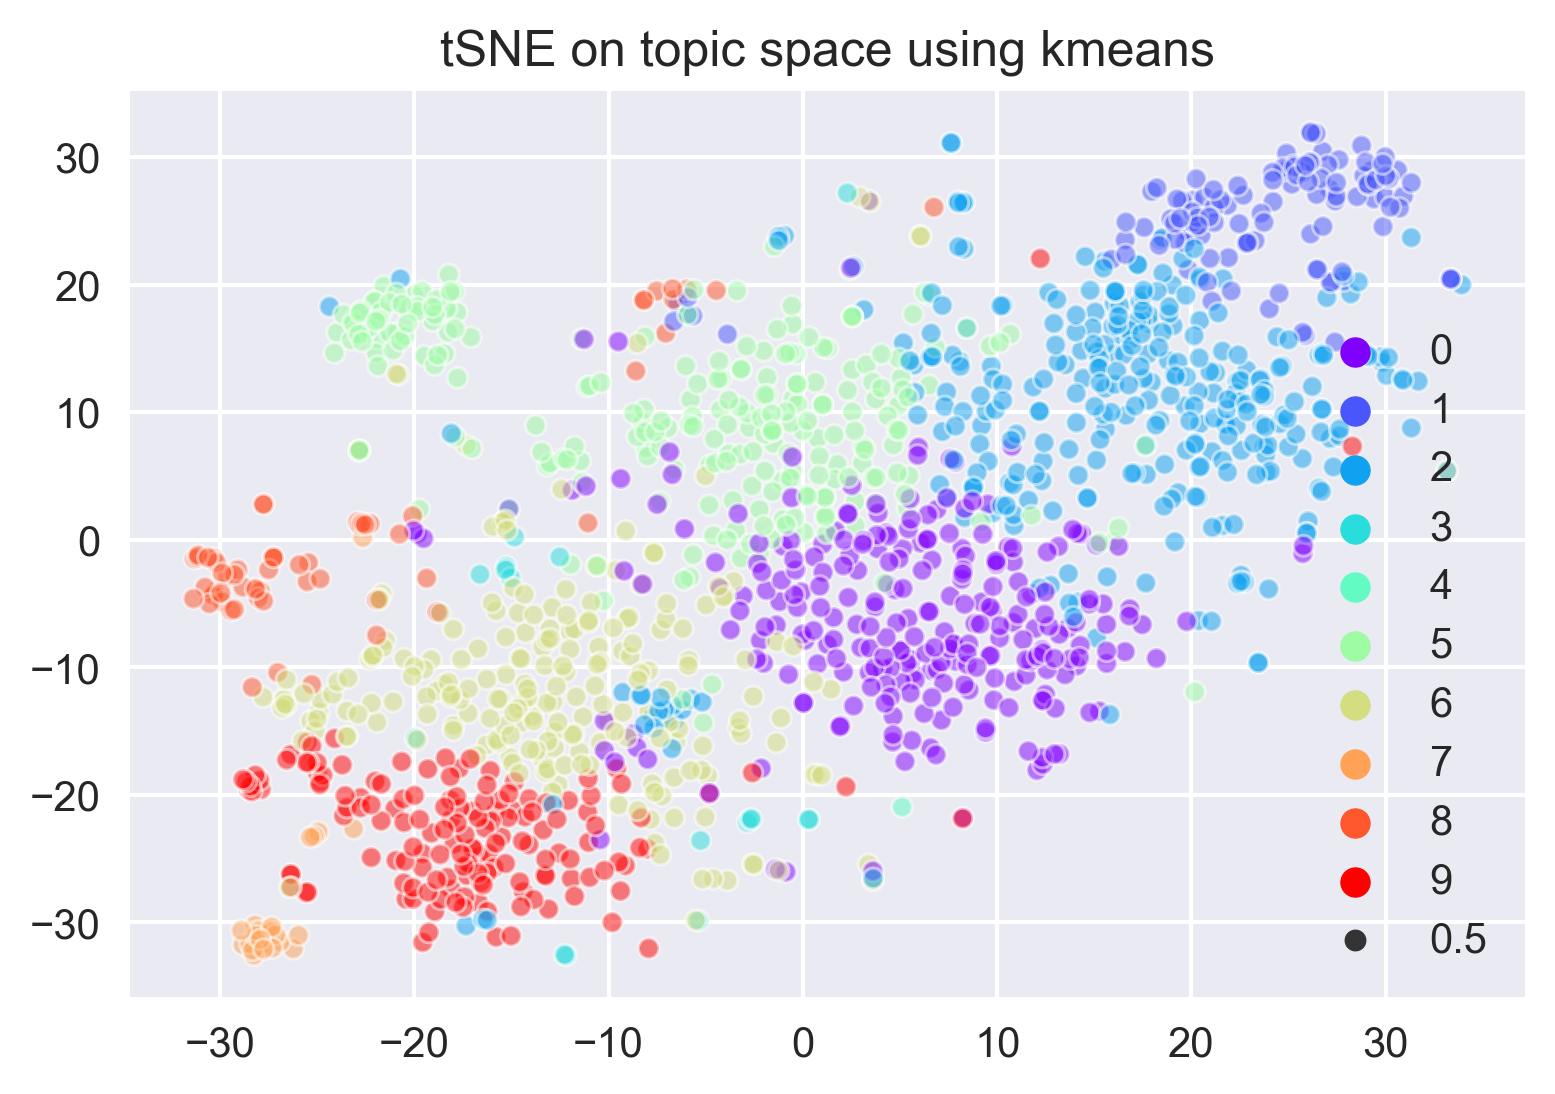

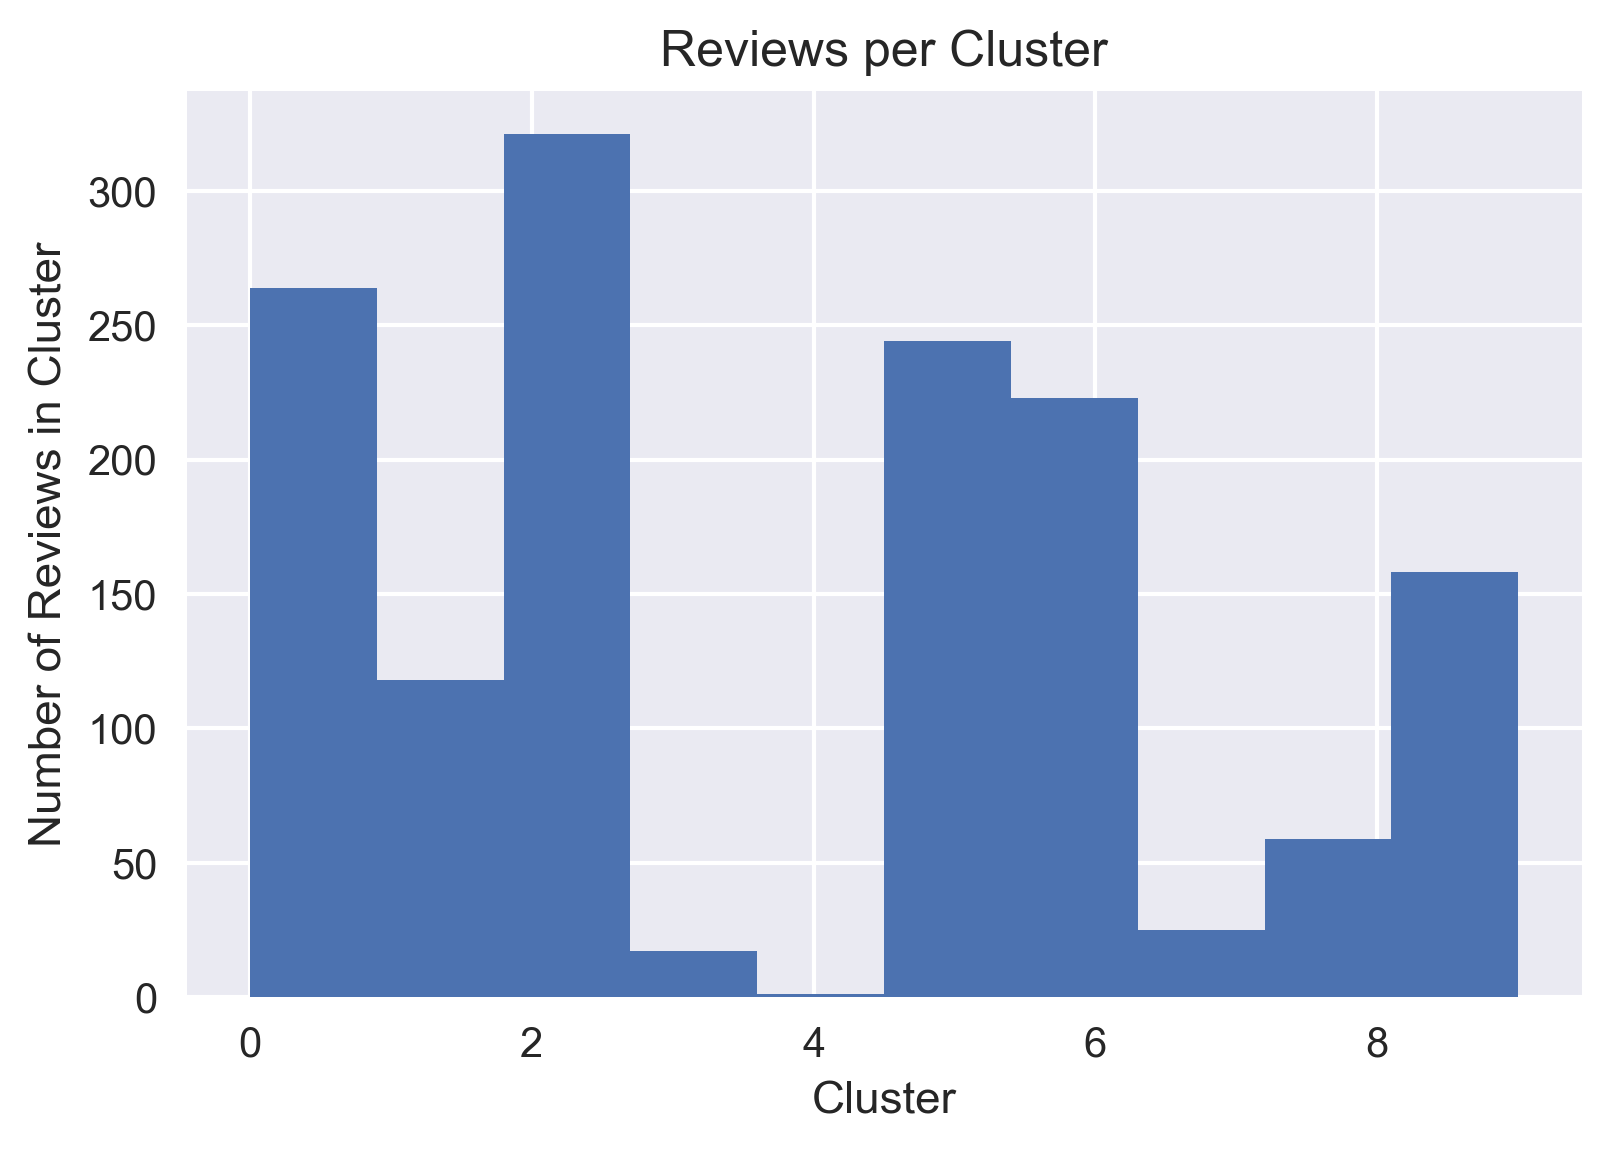

In [20]:
cluster.tsne(2, 50)

# KMeans

In [ ]:
km_cluster=clustering_algorithms.clustering_pipeline(100)

In [ ]:
km_cluster.fit(df_std)

In [ ]:
many_kmeans(km_cluster, 15, df_std, names)

In [ ]:
cluster.tsne(3, 20)

# DBSCAN

In [ ]:
db_cluster=clustering_algorithms.clustering_pipeline(100)

In [ ]:
db_cluster.fit(df_std)

In [ ]:
many_db(db_cluster, 15, df_std, names)

# Mean Shift

In [ ]:
ms_cluster=clustering_algorithms.clustering_pipeline(100)

In [ ]:
ms_cluster.fit(df_std)

In [ ]:
many_meanshift(cluster, quantile, n_samples, data, column)

# Spectral

In [ ]:
spec_cluster=clustering_algorithms.clustering_pipeline(100)

In [ ]:
spec_cluster.fit(df_std)

In [ ]:
many_spectral(cluster, n_clusters)

# Finding the Closest Schools to A Given One

In [ ]:
def closest_to_given(cluster, chosen_cluster):
    cluster.chosen_cluster(a, b)
    g
    return cat